In [1]:
# Package imports
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.facecolor'] = 'w'
from astropy import log, constants, coordinates, units as u
import warnings
warnings.filterwarnings('ignore')
log.setLevel('ERROR')

# My functions
from mol_model import fetch_cubes, model_and_plot, list_mol_tags, get_cubes_from_mask, plot_mom0s

results = '/blue/adamginsburg/abulatek/brick/symlinks/imaging_results/contsub_smoothed_cubes_K/'

In [2]:
# Get list of all cubes
import glob
cubefns = glob.glob(f"{results}/source_ab_*.image.commonbeam.contsub.K.fits")

In [3]:
# Set coordinate of central source
crd = coordinates.SkyCoord("17:46:10.6339473267 -28:42:17.9807702398", frame='icrs', unit=(u.h, u.deg))

In [4]:
# Get only the cubes that have our line of interest in them
mol_tag = 34502 # 34002
cubes, tbl = fetch_cubes(cubefns, catalog='CDMS', mol_name_pyspeckit=None, mol_tag_pyspeckit=mol_tag, parse_loc=False, ret_tbl=True)

[<Table length=1>
    FREQ      ERR    LGINT    DR     ELO    ...  F1l   F2l   F3l  name  Lab 
    MHz       MHz   nm2 MHz         1 / cm  ...                             
  float64   float64 float64 int64  float64  ... int64 int64 int64 str3  bool
----------- ------- ------- ----- --------- ... ----- ----- ----- ---- -----
102026.5413  0.3279 -8.5761     3 1418.4665 ...    --    --    --  H2S False, <Table length=2>
    FREQ      ERR    LGINT    DR     ELO    ...  F1l   F2l   F3l  name  Lab 
    MHz       MHz   nm2 MHz         1 / cm  ...                             
  float64   float64 float64 int64  float64  ... int64 int64 int64 str3  bool
----------- ------- ------- ----- --------- ... ----- ----- ----- ---- -----
102026.5413  0.3279 -8.5761     3 1418.4665 ...    --    --    --  H2S False
103127.7155  0.3419 -9.0443     3 1418.4664 ...    --    --    --  H2S False, <Table length=2>
    FREQ      ERR    LGINT    DR     ELO    ...  F1l   F2l   F3l  name  Lab 
    MHz       MHz   nm

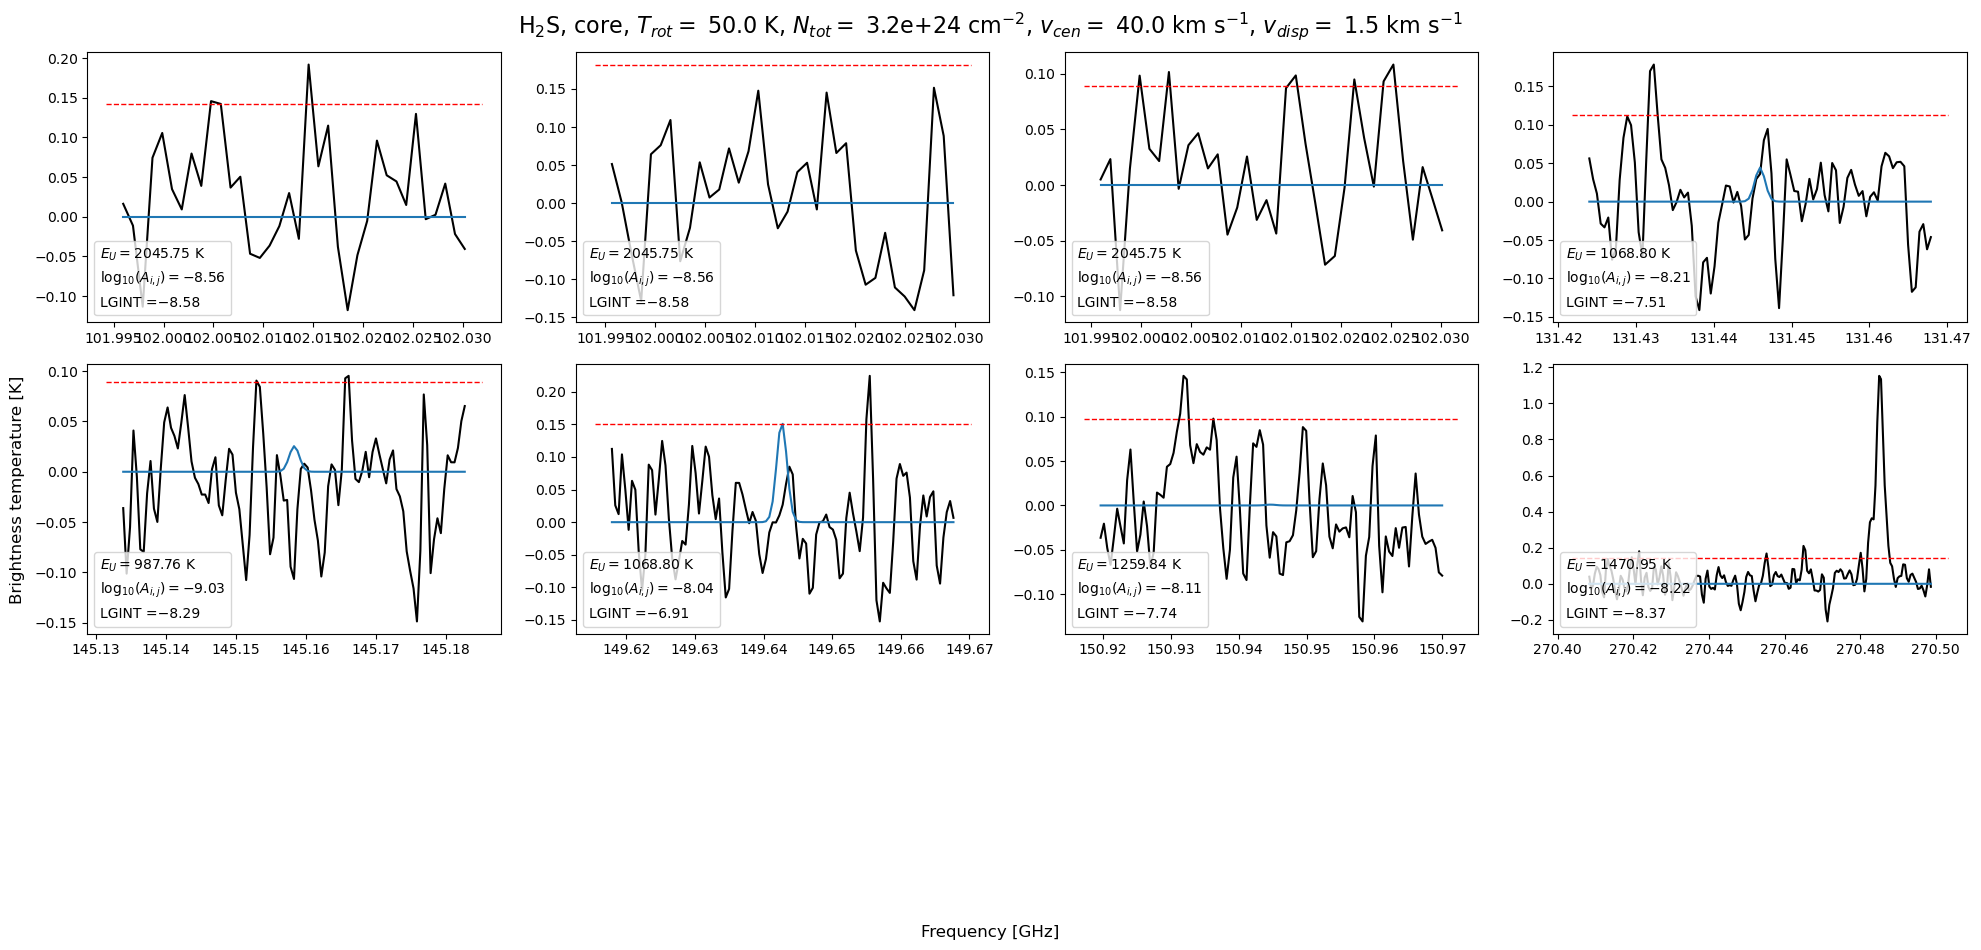

In [21]:
# Generate the model and plot the model and data spectra
model_and_plot(cubes, temp = 50., N_tot = 3.2e+24, v_cen = 40.*u.km/u.s, v_disp = 1.5*u.km/u.s,
               mol_name_pyspeckit=None, mol_tag_pyspeckit=mol_tag, catalog='CDMS', fig_width=20, fig_height=10, 
               nrows=2, ncols=4, parse_loc=False, line_by_line=True, name_for_plot=f'H$_2$S', extr_type="coord", crd=crd,
               show_2_sigma=True, EU_cutoff_K=10000, aij_cutoff=-100, LGINT_cutoff=-8.58)

In [22]:
# Get subcubes based on mask
cubes_masked = get_cubes_from_mask("diffuse_regions.fits", 1, cubes, plot_region=False)

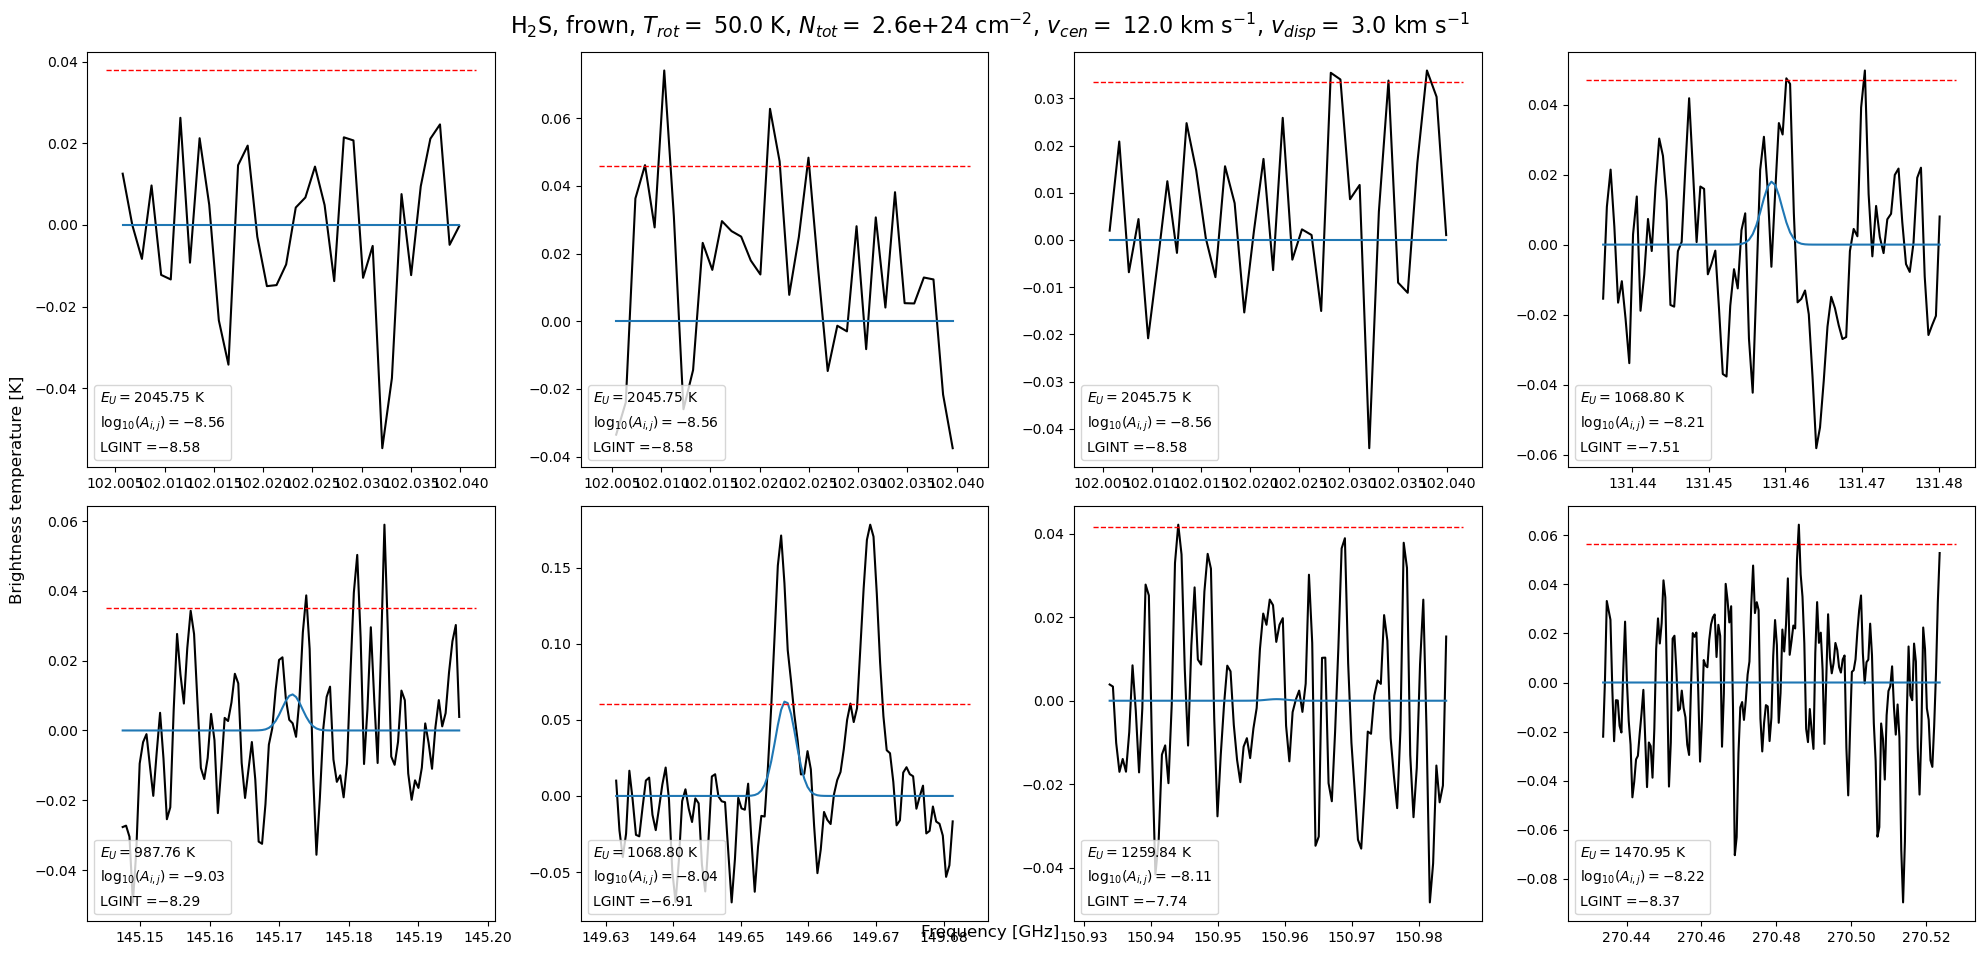

In [30]:
# Generate the model and plot the model and data spectra
freqs = model_and_plot(cubes_masked, temp = 50., N_tot = 2.6e+24, v_cen = 12.*u.km/u.s, v_disp = 3.*u.km/u.s,
                       mol_name_pyspeckit=None, mol_tag_pyspeckit=mol_tag, catalog='CDMS', fig_width=20, fig_height=10, 
                       nrows=2, ncols=4, parse_loc=False, line_by_line=True, name_for_plot=f'H$_2$S', 
                       extr_type="reg", show_2_sigma=True, return_freqs=True, EU_cutoff_K=10000, aij_cutoff=-100, LGINT_cutoff=-8.58)

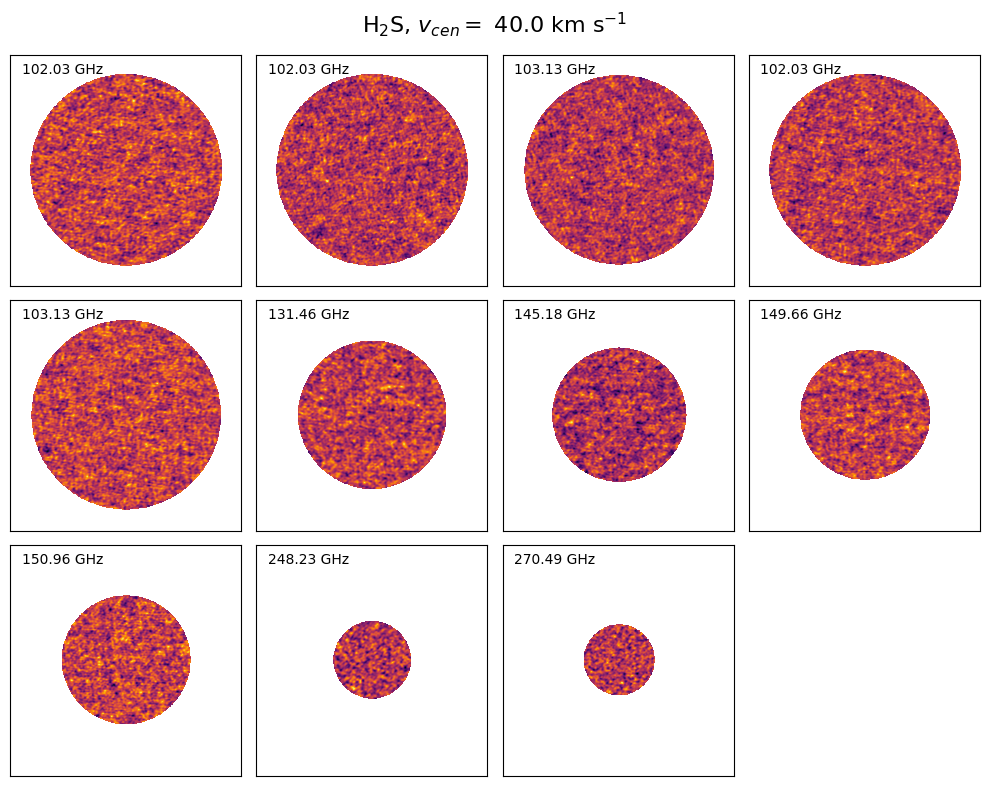

In [12]:
# Plot moment maps
plot_mom0s(cubes, freqs, v_cen=40.*u.km/u.s, fig_width=10, fig_height=8, nrows=3, ncols=4, name_for_plot=f'H$_2$S')

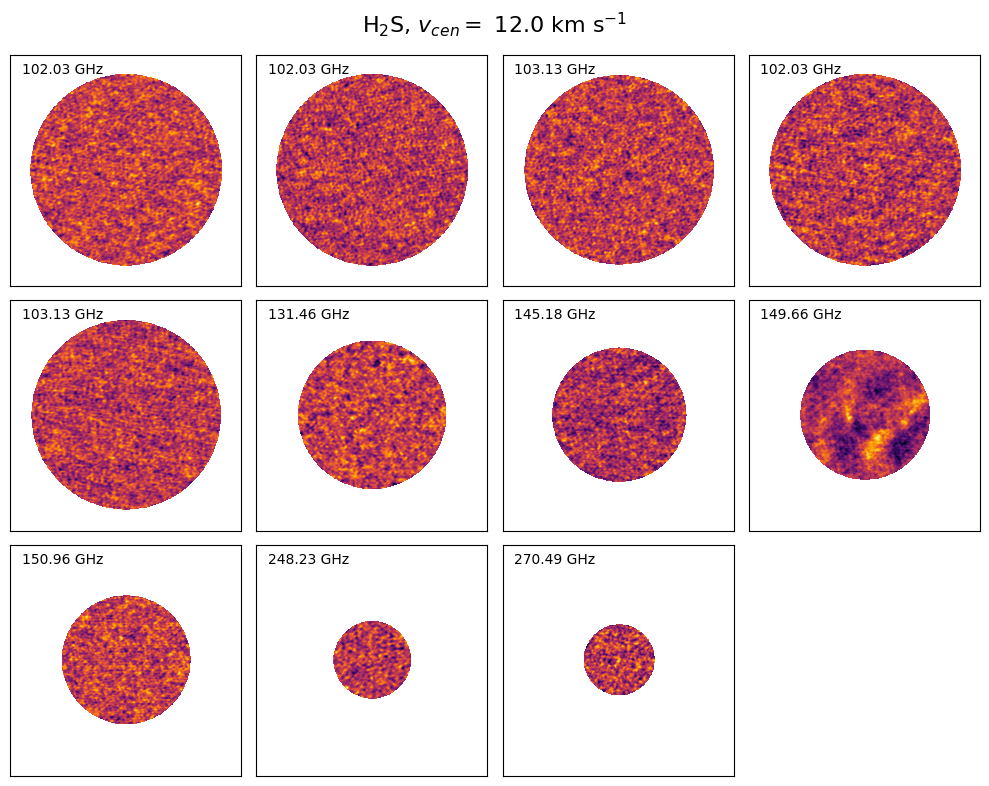

In [13]:
# Plot moment maps
plot_mom0s(cubes, freqs, v_cen=12.*u.km/u.s, fig_width=10, fig_height=8, nrows=3, ncols=4, name_for_plot=f'H$_2$S')